In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import torch
from torch import optim, nn
from math import exp

import numpy as np

from tqdm import tqdm
from random import randint

from load_dataset import load_dataset, plot_image, save_image
from auto_encoder2 import PAutoE

device = "cpu"

pimages = load_dataset().to(device)

In [3]:
T = 30
beta = torch.linspace(10e-4, 0.2, T)

alpha = 1 - beta

alpha_ = torch.zeros(T)

for i in range(T):
    alpha_[i] = torch.prod(alpha[0:i+1])

alpha_

tensor([0.9990, 0.9911, 0.9766, 0.9555, 0.9283, 0.8955, 0.8577, 0.8157, 0.7701,
        0.7218, 0.6715, 0.6202, 0.5685, 0.5172, 0.4670, 0.4185, 0.3721, 0.3283,
        0.2874, 0.2497, 0.2152, 0.1839, 0.1560, 0.1312, 0.1095, 0.0906, 0.0743,
        0.0605, 0.0488, 0.0390])

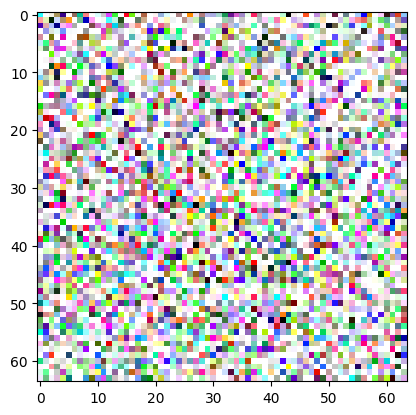

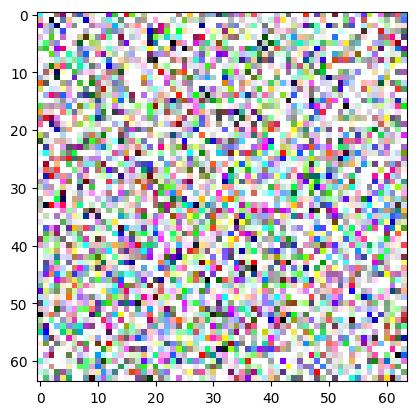

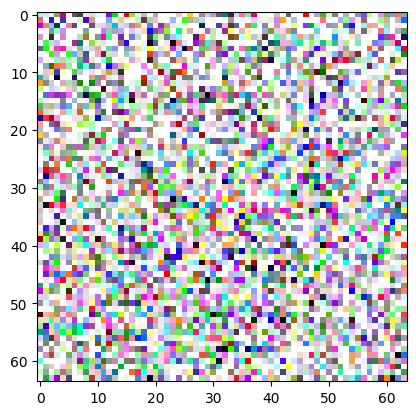

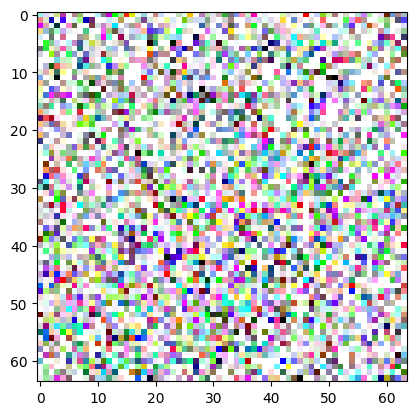

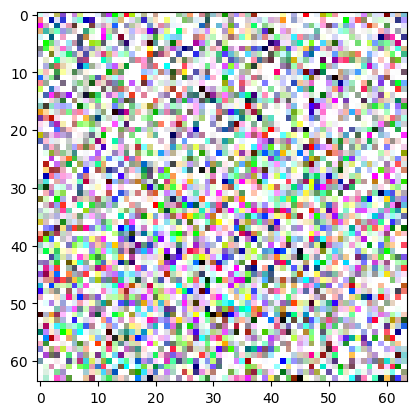

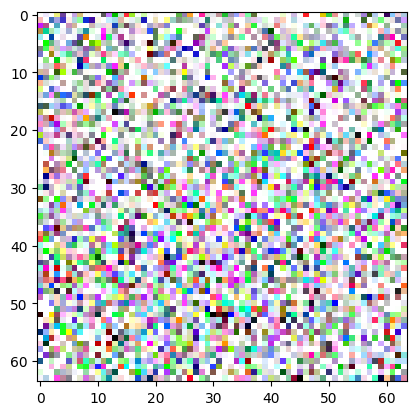

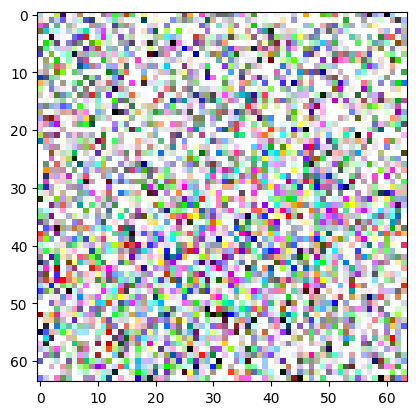

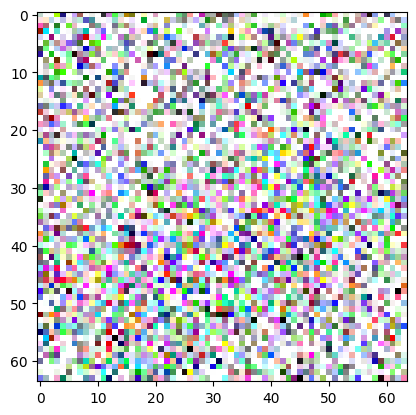

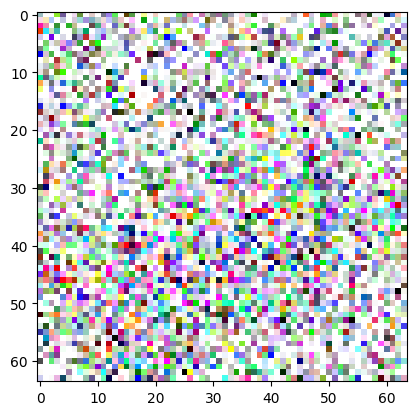

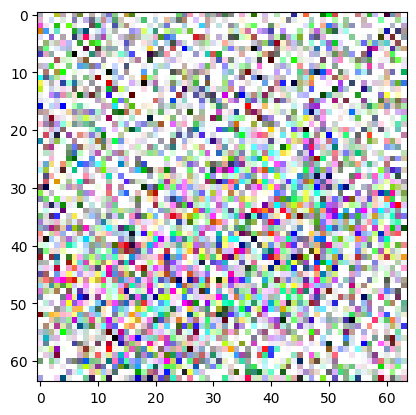

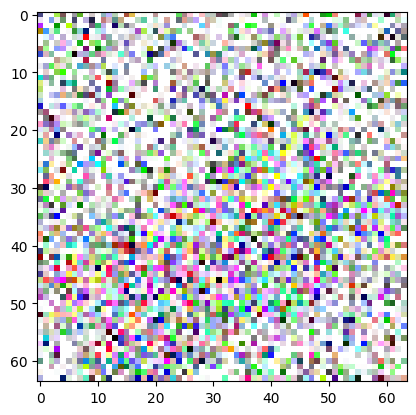

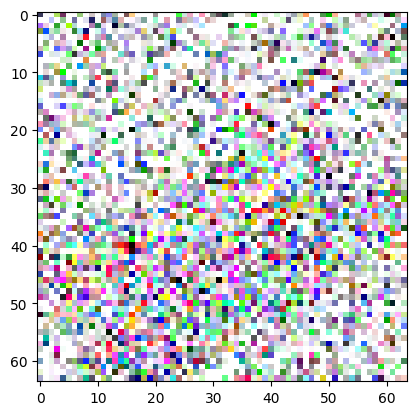

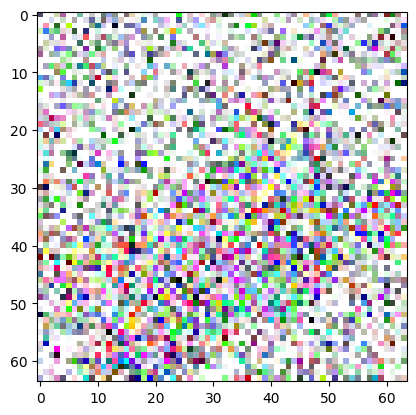

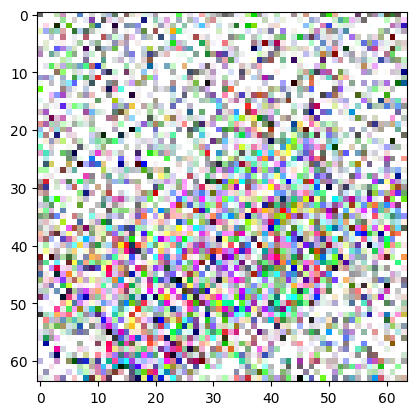

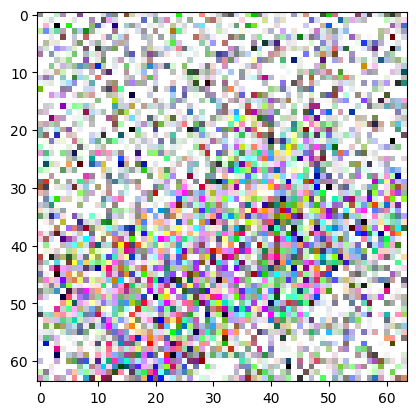

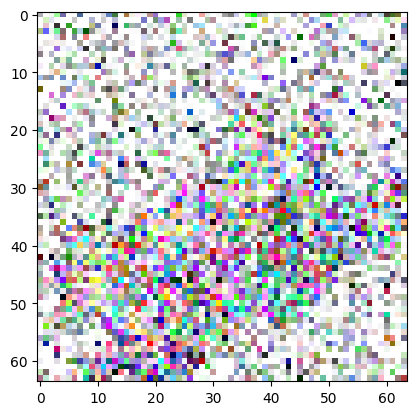

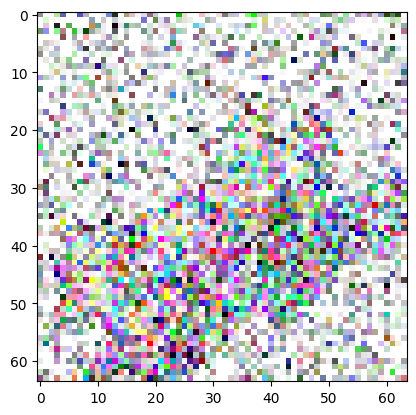

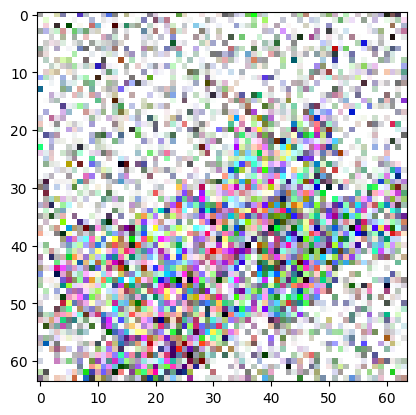

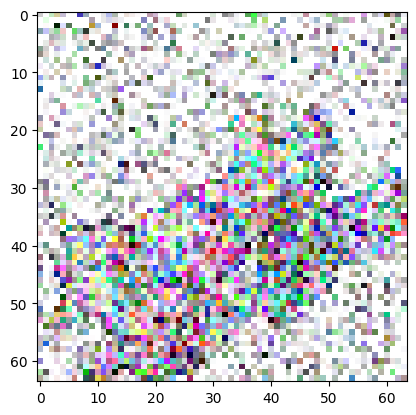

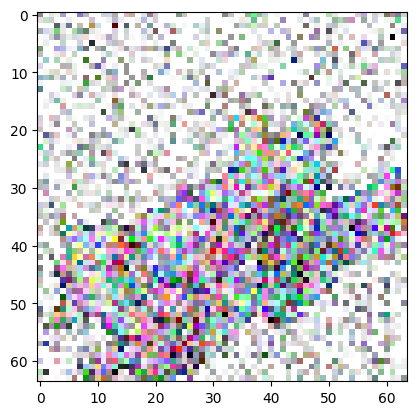

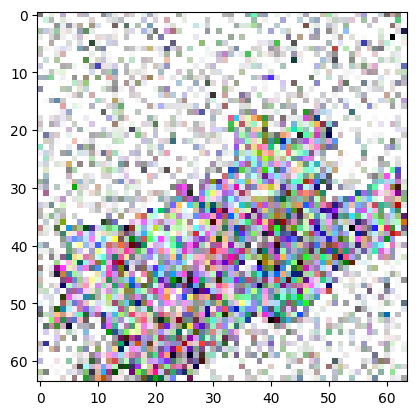

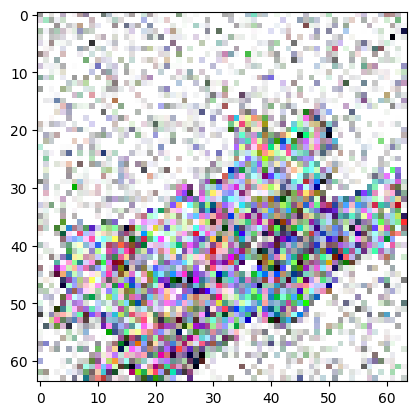

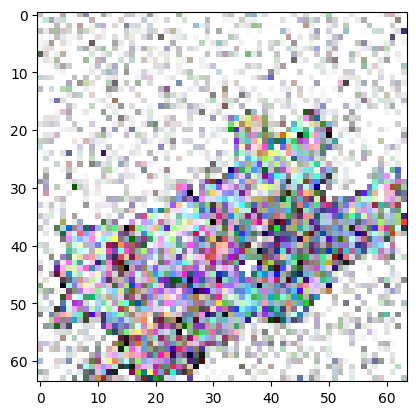

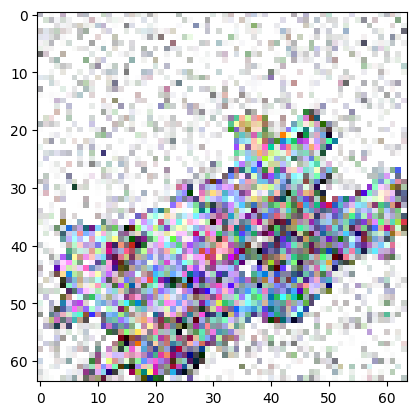

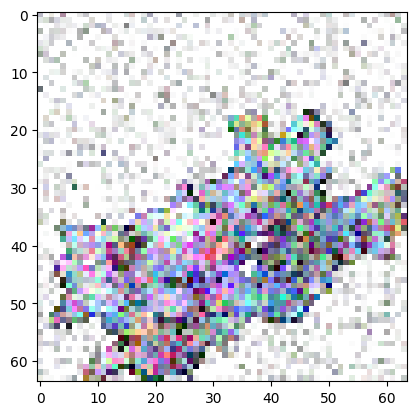

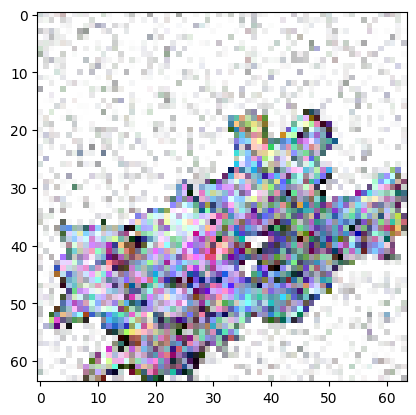

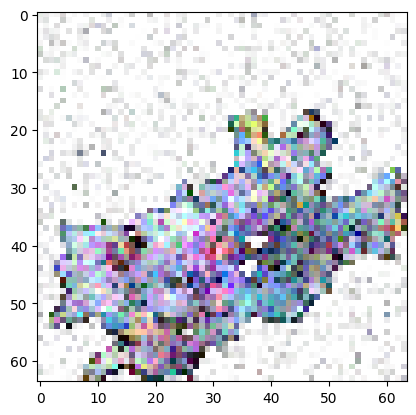

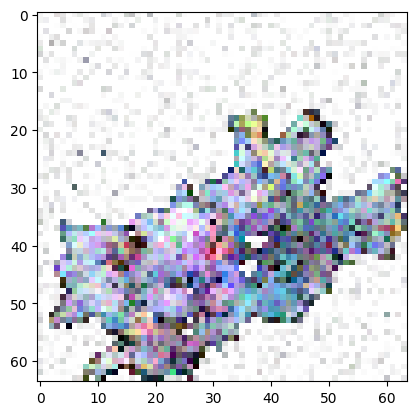

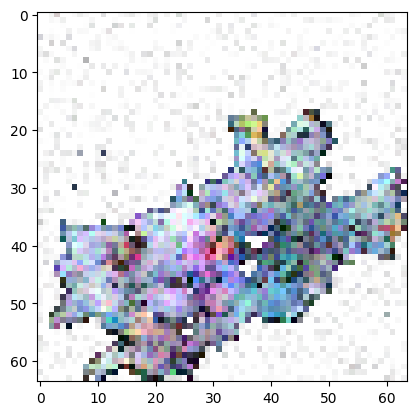

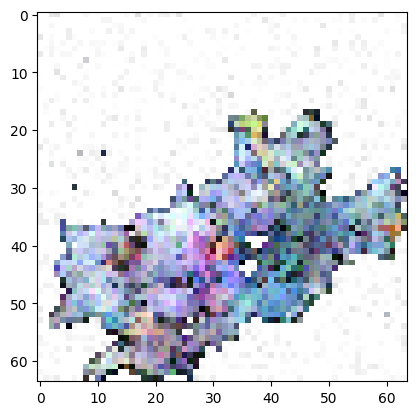

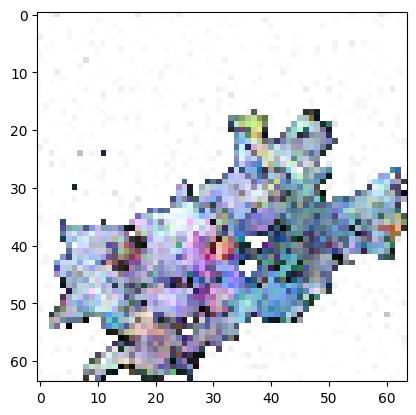

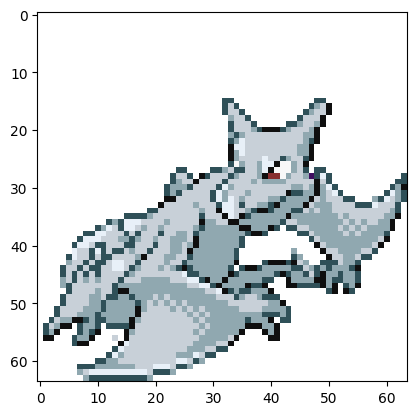

In [22]:
pkm = 141
tt = 30

z = torch.randn((4,64,64), device=device)
x = torch.sqrt(alpha_[tt-1]) * pimages[0][pkm] + torch.sqrt(1-alpha_[tt-1]) * z

plot_image(x)

for t in reversed(range(tt)):

    model = torch.jit.load(f"./model_{t}.pt").eval().to(device)
    
    z = torch.randn((4,64,64), device=device) 
    e = model(x[None])[0] * (1 - alpha[t]) / torch.sqrt(1 - alpha_[t])

    x = (1 / torch.sqrt(alpha[t])) * (x - e) + z * torch.sqrt(beta[t])

    plot_image(x)

    #z = torch.randn((4,64,64), device=device)
    #x0 = model(x[None])[0]
    #x = torch.sqrt(alpha_[t]) * x0 + torch.sqrt(1-alpha_[t]) * z


plot_image(pimages[0][pkm])